In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error

colour_pal = sns.color_palette()

In [3]:
df = pd.read_csv("..\\data\\data_for_analysis\\actuals_1.csv")
df2 = pd.read_csv("..\\data\\data_for_analysis\\actuals_2.csv")

# Create an overall dataset
df = pd.concat([df, df2], axis=0)
df = df.set_index("Time")

# Create a dataset with just "Time" and "Load (kW)"
df_load = df.iloc[:, 0].to_frame()

In [4]:
# Convert the index to DatetimeIndex
df_load.index = pd.to_datetime(df_load.index)
df.index = pd.to_datetime(df.index)

C:\Users\Nathan William\AppData\Local\Temp\ipykernel_19532\623076018.py:2: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_load.index = pd.to_datetime(df_load.index)
C:\Users\Nathan William\AppData\Local\Temp\ipykernel_19532\623076018.py:3: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df.index = pd.to_datetime(df.index)


In [22]:
# Save the datasets to CSV files
df.to_csv("..\\data\\data_for_analysis\\df.csv")
df_load.to_csv("..\\data\\data_for_analysis\\df_load.csv")

In [5]:
df_load.head()

,Load (kW)
Time,
2017-03-18 00:00:00,1.031472e+06
2017-03-18 01:00:00,1.007206e+06
2017-03-18 02:00:00,9.861084e+05
2017-03-18 03:00:00,9.707610e+05
2017-03-18 04:00:00,9.622584e+05


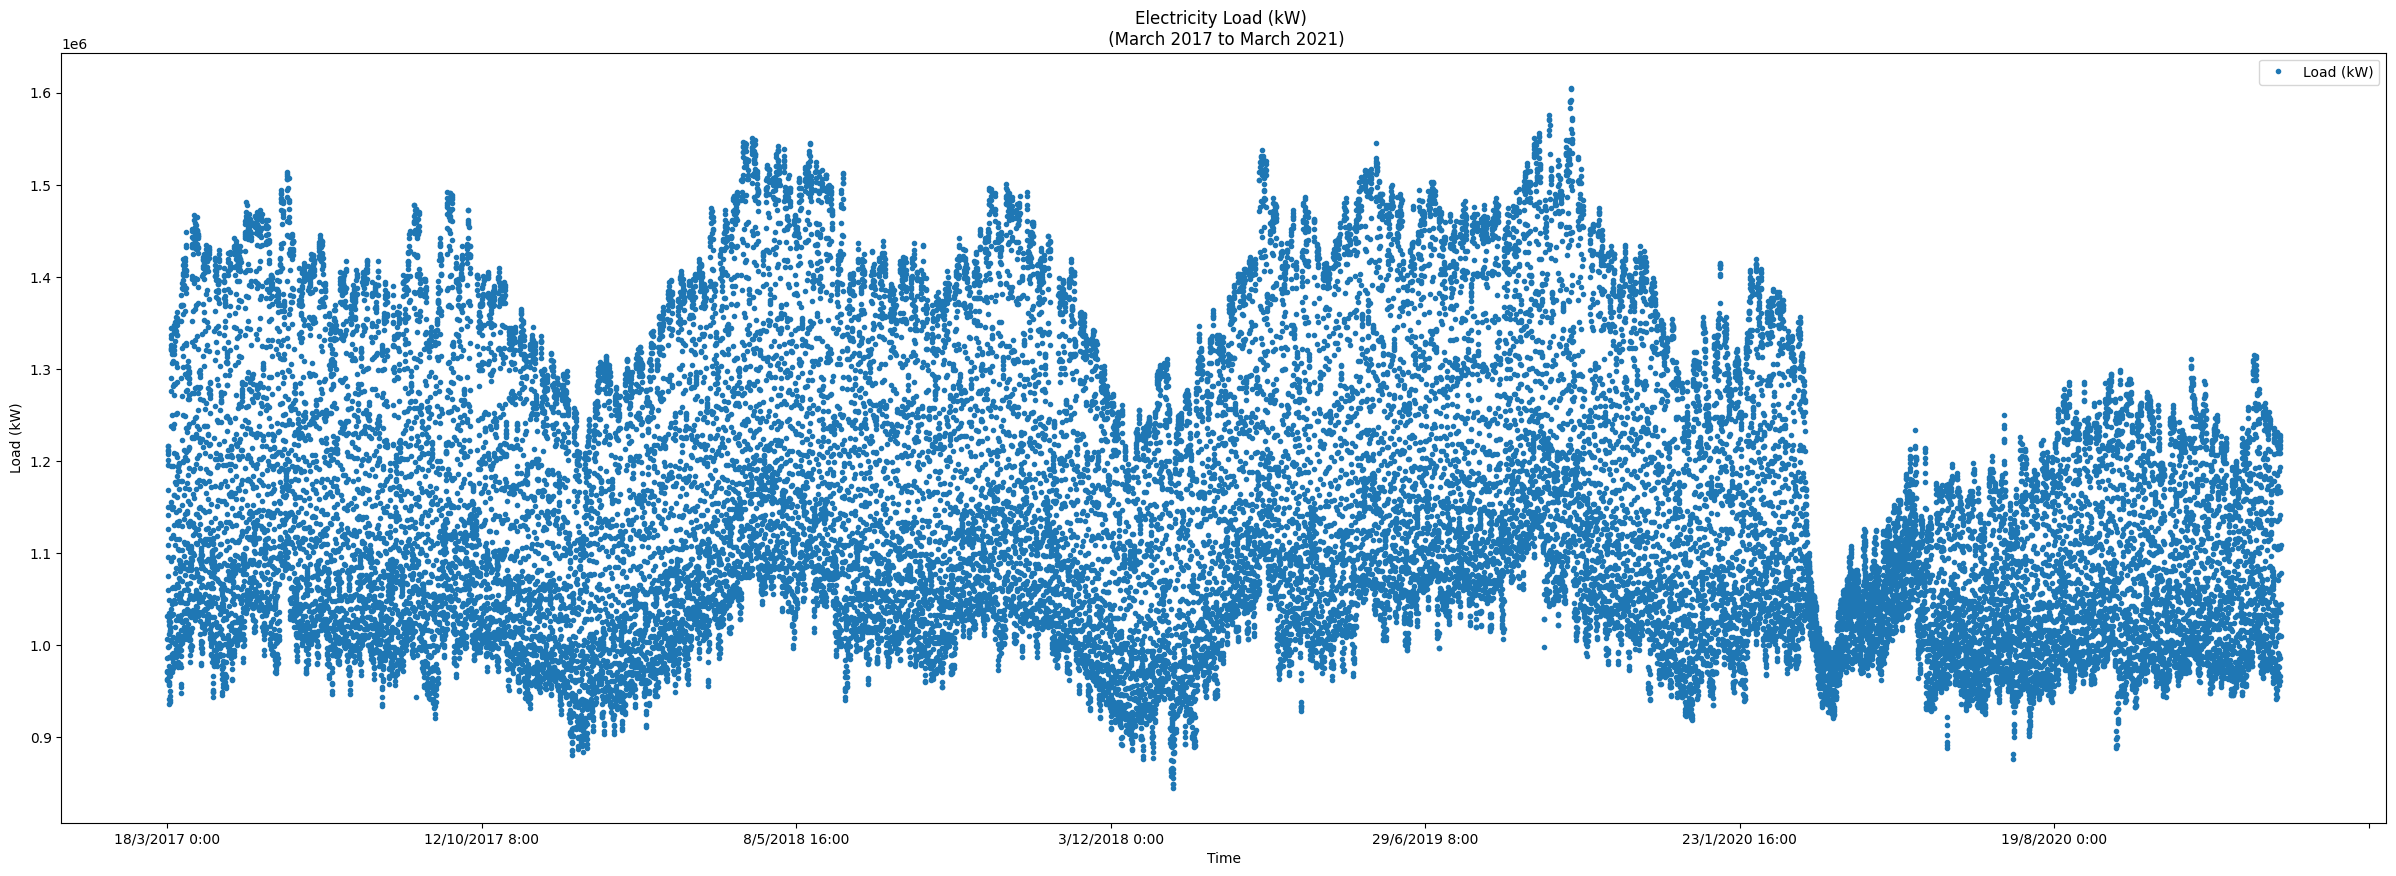

In [4]:
df_load.plot(style = ".", 
             figsize = (30, 10), 
             color = colour_pal, 
             title = "Electricity Load (kW) \n (March 2017 to March 2021)",
             ylabel = "Load (kW)")

plt.show()

### Observing Load : Overall
- We observe from above that the following dataset is clearly seasonal. During the last few months of each year there is a great decrease in electricity demand and load overall in the city. It is also important to note that these drops begin just before the end of the year and begin to reach their peaks again towards the end of the summer months. This signified that there is a surge in load over the colder months of the year, indicating that this may be due to the use greater use of heaters and other winter related appliances. 

- What is also visible is that there is a significant decrease in electricity demand in the first quarter of the year 2020, this is the time where the COVID-19 pandemic hit Australia. The pandemic led to industries being forced to shut down and the inclusion of remote work for workers to comply to COVID-19 protocols. This signifies that this area may be in an industrialised. This insight is further supported by observing that where there is supposed to be a peak in load with respect to previous data, there is actually a trough.

### Observing Load : Over Different Periods

In [5]:
def create_features(input_df):
    """
    Creating specific time segments from datetime.
    """
    # Convert the index to a DatetimeIndex if it's not already
    input_df.index = pd.to_datetime(input_df.index)
    
    input_df["hour"] = input_df.index.hour
    input_df["dayofweek"] = input_df.index.day_of_week #Monday = 0, Sunday = 6
    input_df["quarter"] = input_df.index.quarter
    input_df["month"] = input_df.index.month
    input_df["year"] = input_df.index.year

    return input_df

df_load_dt = df_load.copy()
df_load_dt = create_features(df_load_dt)

C:\Users\Nathan William\AppData\Local\Temp\ipykernel_8784\2415779654.py:6: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  input_df.index = pd.to_datetime(input_df.index)


In [ ]:
df_load_dt.to_csv("..\\data\\data_for_analysis\\df_load_dt.csv")

In [17]:
df_load_dt

,Load (kW),hour,dayofweek,quarter,month,year
Time,,,,,,
2017-03-18 00:00:00,1.031472e+06,0,5,1,3,2017
2017-03-18 01:00:00,1.007206e+06,1,5,1,3,2017
2017-03-18 02:00:00,9.861084e+05,2,5,1,3,2017
2017-03-18 03:00:00,9.707610e+05,3,5,1,3,2017
2017-03-18 04:00:00,9.622584e+05,4,5,1,3,2017
...,...,...,...,...,...,...
2021-01-15 19:00:00,1.141079e+06,19,4,1,1,2021
2021-01-15 20:00:00,1.108896e+06,20,4,1,1,2021
2021-01-15 21:00:00,1.078978e+06,21,4,1,1,2021


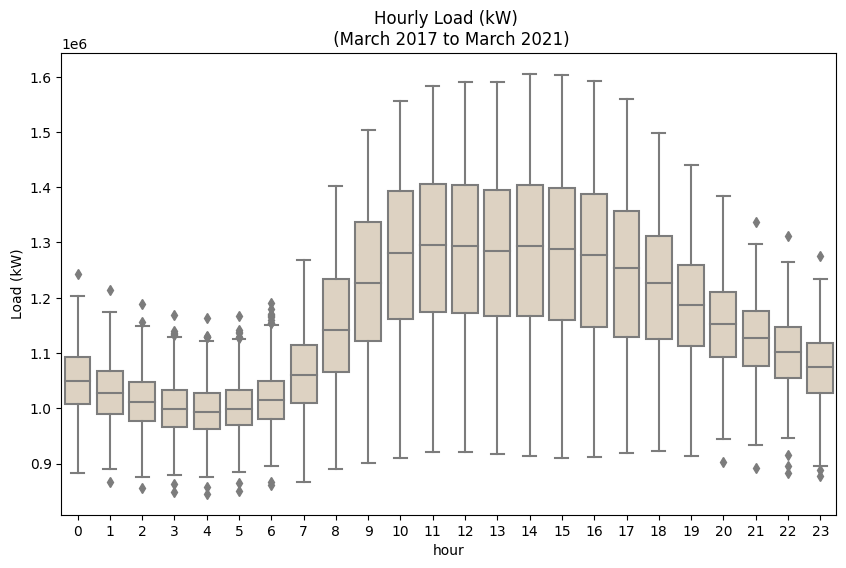

In [7]:
plt.figure(figsize = (10, 6))
sns.boxplot(data = df_load_dt, x = "hour", y = 'Load (kW)', color = "#E1D3BE")
plt.title("Hourly Load (kW) \n (March 2017 to March 2021)")
plt.show()

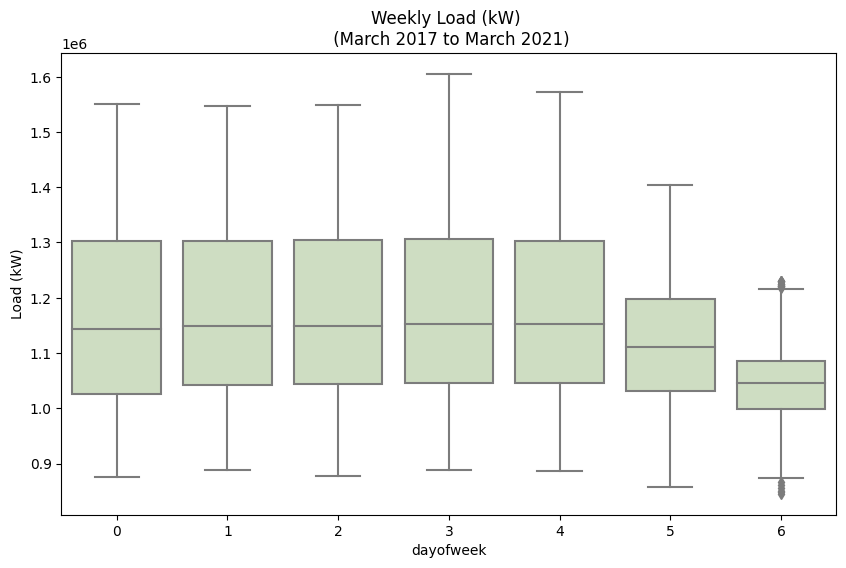

In [8]:
plt.figure(figsize = (10, 6))
sns.boxplot(data = df_load_dt, x = "dayofweek", y = 'Load (kW)', color = "#CEE1BE")
plt.title("Weekly Load (kW) \n (March 2017 to March 2021)")
plt.show()

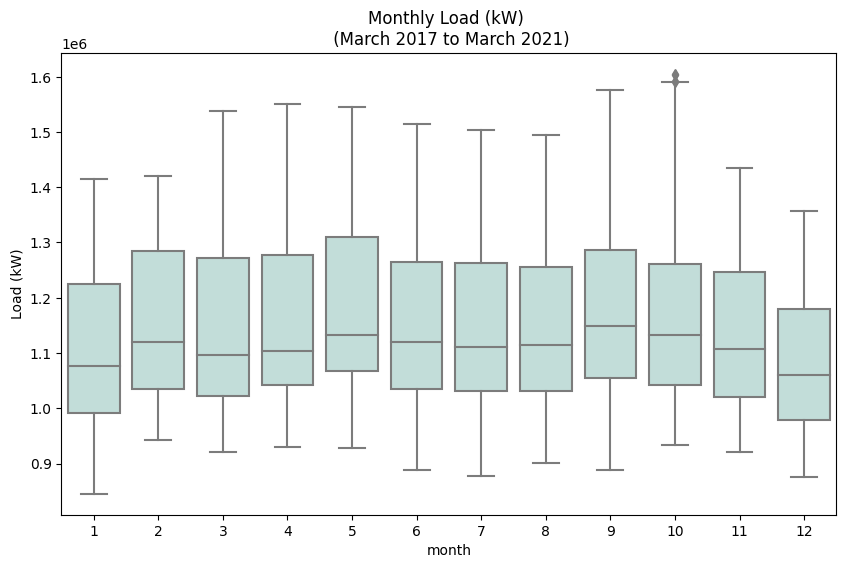

In [9]:
plt.figure(figsize = (10, 6))
sns.boxplot(data = df_load_dt, x = "month", y = 'Load (kW)', color = "#BEE1DC")
plt.title("Monthly Load (kW) \n (March 2017 to March 2021)")
plt.show()

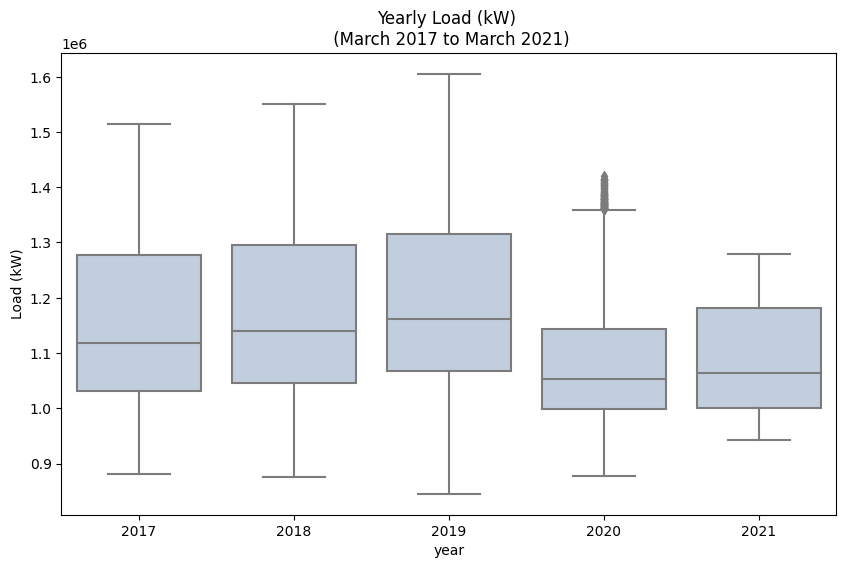

In [10]:
plt.figure(figsize = (10, 6))
sns.boxplot(data = df_load_dt, x = "year", y = 'Load (kW)', color = "#BECDE1")
plt.title("Yearly Load (kW) \n (March 2017 to March 2021)")
plt.show()

- From the hourly mapping we observe that there is a significant increase in load between the working hours of the day and a drop before and after those hours. In addition, it can be clearly seen that there is a significant lower load during the weekends as compared to the weekdays. Furthermore, the load within the first three years of the dataset is significantly greater as specified by the higher medians of the load overall, therefore, the area was significantly impacted by the pandemic and lowered load over those years. Ultimately, we found further evidence to support our hypothesis that this city is based within an industrialised area. 

- Since we believe this city was an industrial city we expect that there will be a significant differences between the correlations of the load between the pre-covid and during covid times. Specifically, we expect there to be lower correlation between the dataset during covid.

### Seasonal Decomposition Analysis

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [7]:
df_resampled = df_load.resample('D').mean()

C:\Users\Nathan William\AppData\Local\Temp\ipykernel_8784\1364615088.py:2: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_load.index = pd.to_datetime(df_load.index)


In [8]:
df_resampled

,Load (kW)
Time,
2017-03-18,1.097038e+06
2017-03-19,1.000909e+06
2017-03-20,1.150977e+06
2017-03-21,1.155646e+06
2017-03-22,1.166430e+06
...,...
2021-01-11,1.100884e+06
2021-01-12,1.006929e+06
2021-01-13,1.093211e+06


Text(0.5, 1.0, 'Residual')

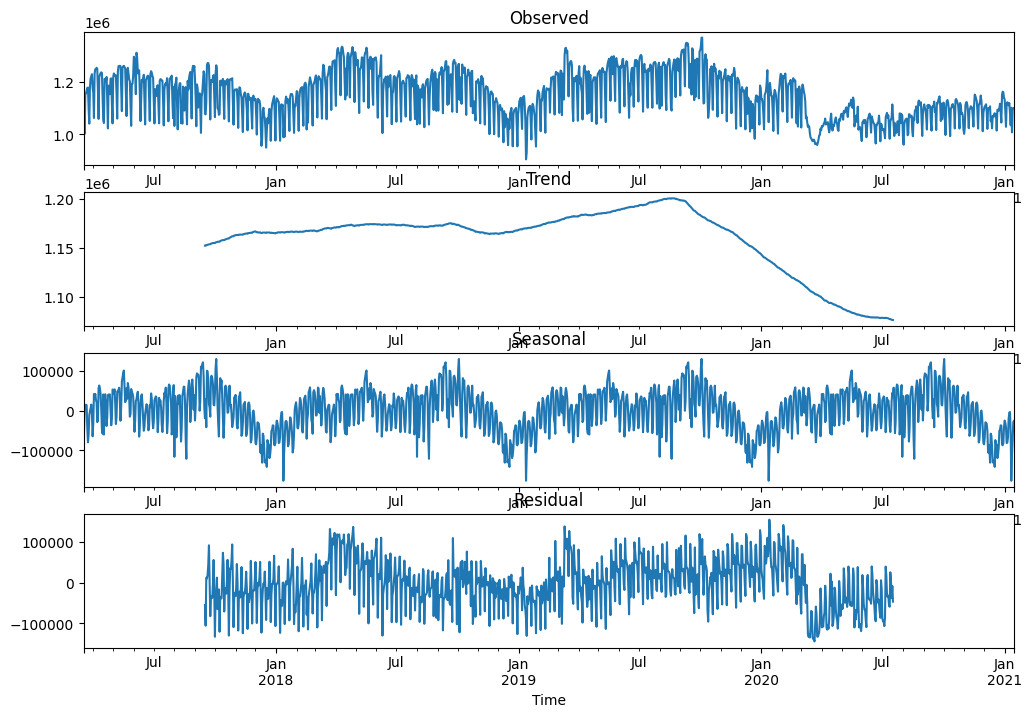

In [25]:
result = seasonal_decompose(df_resampled['Load (kW)'], model='additive', period=365)  # Use resampled data
# Plotting the components
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(12,8))
result.observed.plot(ax=ax1)
ax1.set_title('Observed')
result.trend.plot(ax=ax2)
ax2.set_title('Trend')
result.seasonal.plot(ax=ax3)
ax3.set_title('Seasonal')
result.resid.plot(ax=ax4)
ax4.set_title('Residual')

In [26]:
# Create new Series with NaN values dropped
clean_trend = result.trend.dropna()
clean_seasonal = result.seasonal.dropna()
clean_resid = result.resid.dropna()

In [27]:
# Export to CSV
clean_trend.to_csv('..\\data\\data_for_analysis\\trend.csv')
clean_seasonal.to_csv('..\\data\\data_for_analysis\\seasonal.csv')
clean_resid.to_csv('..\\data\\data_for_analysis\\residual.csv')

### Correlation Analysis

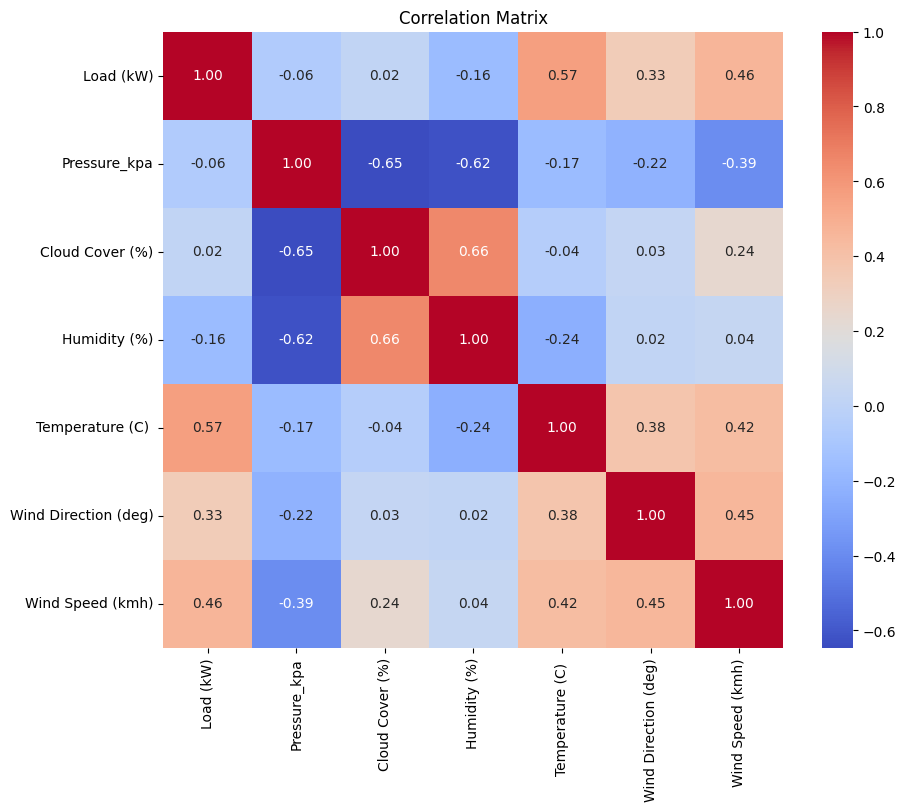

In [6]:
# Calculating the correlation matrix
corr_matrix = df.corr()

# Drawing a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

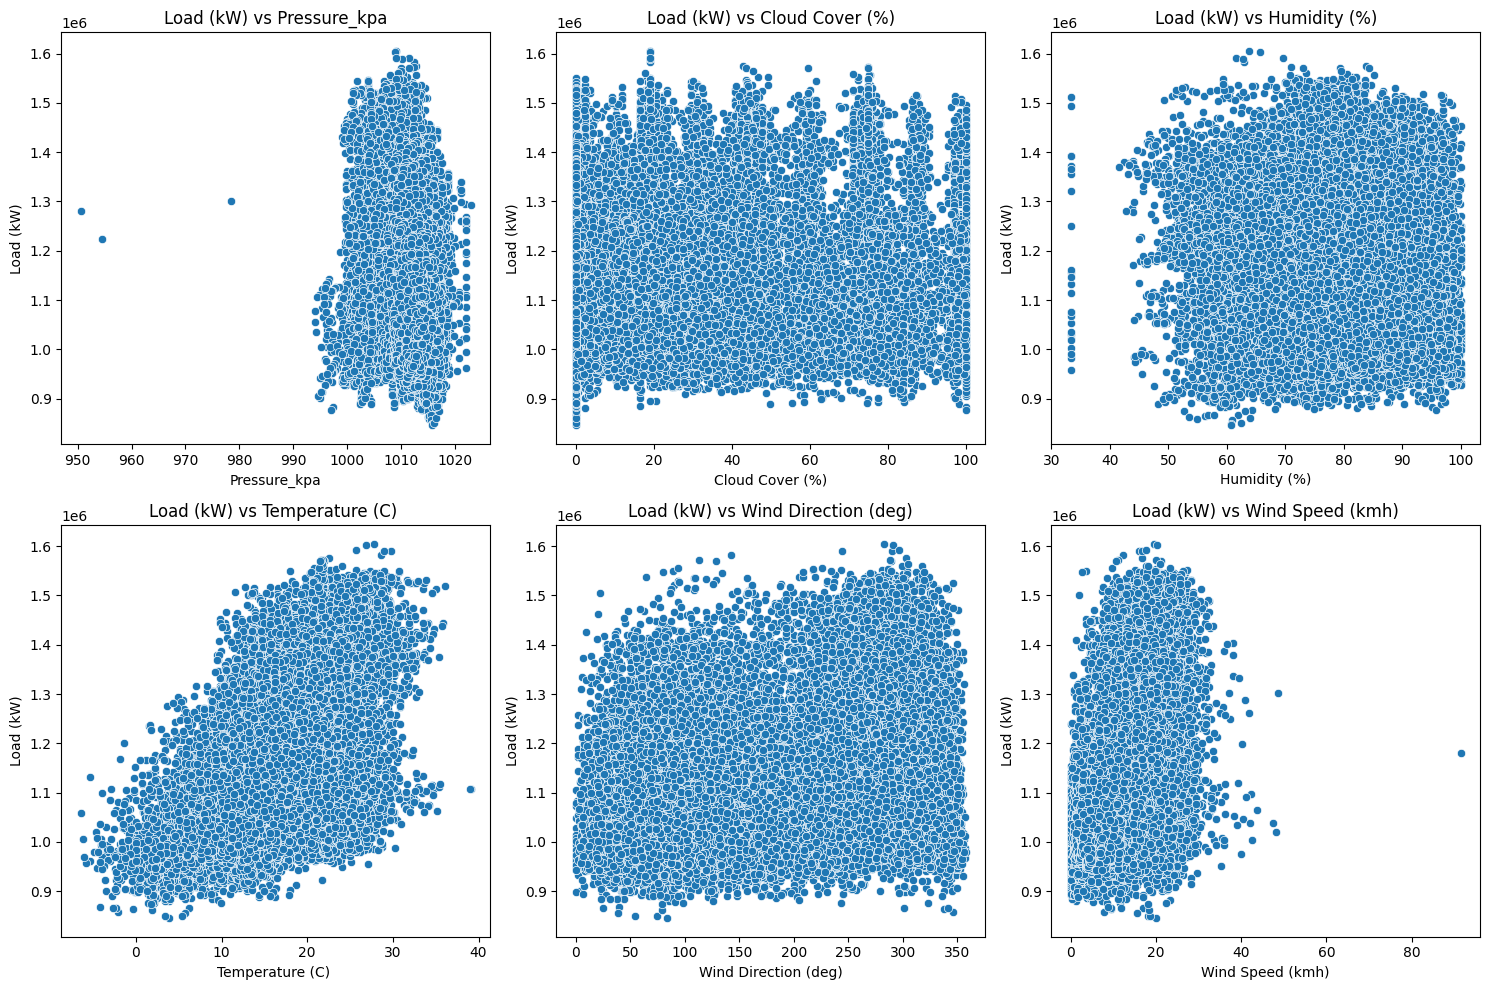

In [12]:
# List of variables to plot against 'Load (kW)'
variables_to_plot = ['Pressure_kpa', 'Cloud Cover (%)', 'Humidity (%)', 'Temperature (C) ', 'Wind Direction (deg)', 'Wind Speed (kmh)']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Flatten the axes array and remove any extra subplots
axes = axes.flatten()
for ax in axes[len(variables_to_plot):]:
    ax.remove()

# Create the scatter plots
for i, var in enumerate(variables_to_plot):
    sns.scatterplot(data=df, x=var, y='Load (kW)', ax=axes[i])
    axes[i].set_title(f'Load (kW) vs {var}')

plt.tight_layout()
plt.show()

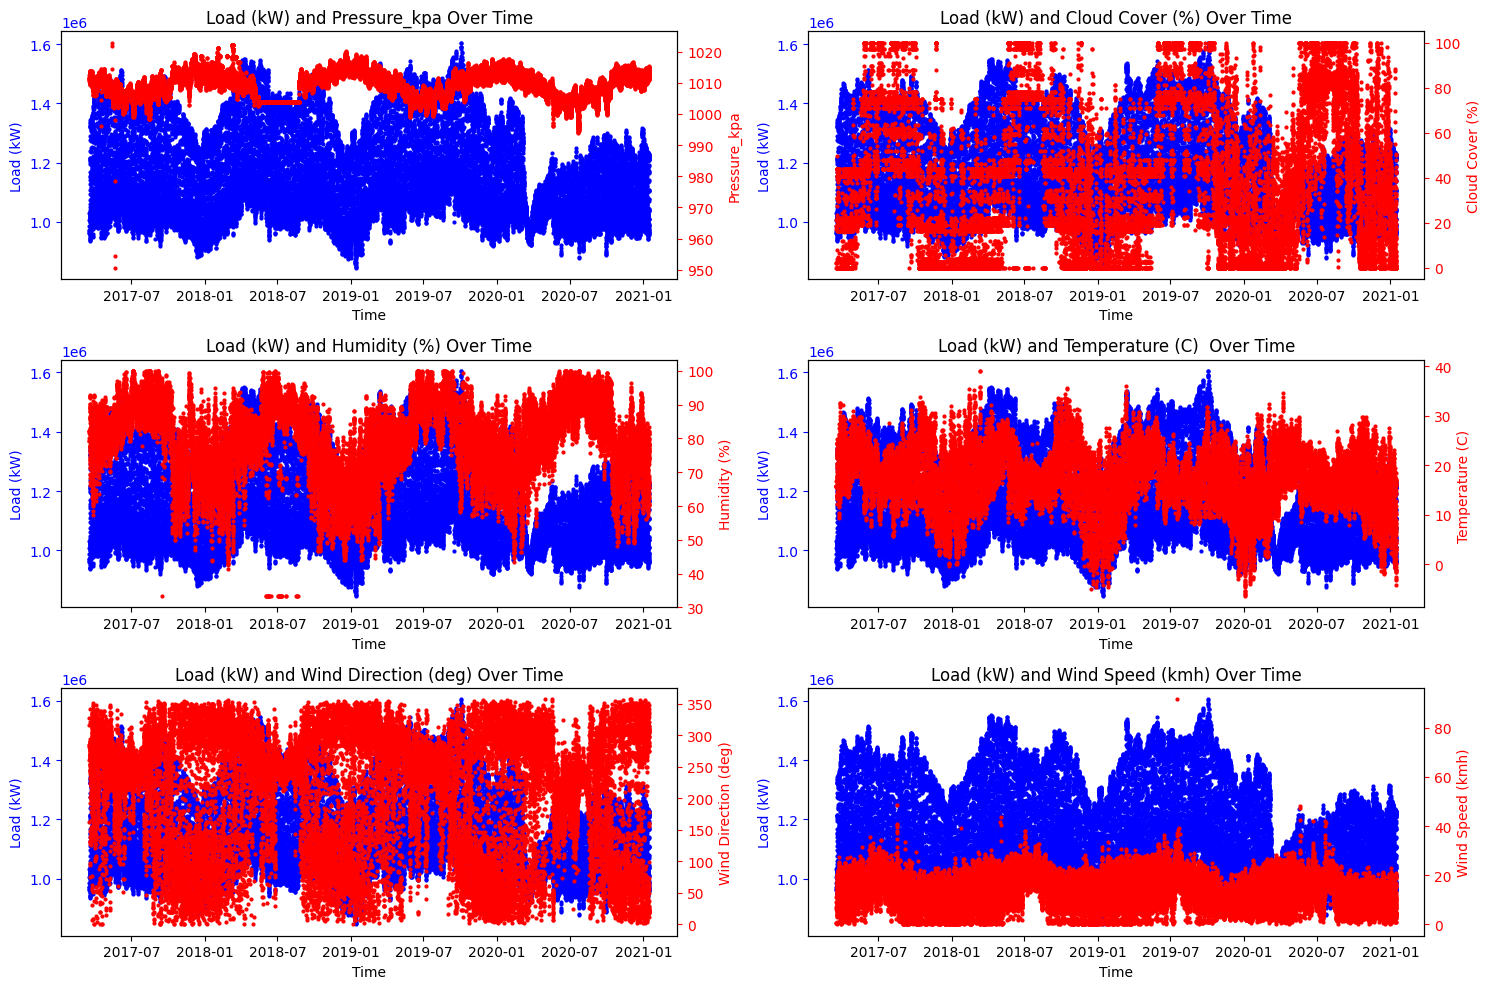

In [18]:
fig, axs = plt.subplots(3, 2, figsize=(15, 10))  # 3 rows, 2 columns, each subplot has a size of 15x18

# Flatten the axis array for easier indexing
axs = axs.flatten()

# Iterate through variables and create separate plots
for i, var in enumerate(variables_to_plot):
    ax1 = axs[i]
    
    # First y-axis for 'Load (kW)'
    ax1.plot(df.index, df['Load (kW)'], 'b.', markersize=4)
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Load (kW)', color='b')
    ax1.tick_params('y', colors='b')
    
    # Create second y-axis for the variable
    ax2 = ax1.twinx()
    ax2.plot(df.index, df[var], 'r.', markersize=4)
    ax2.set_ylabel(var, color='r')
    ax2.tick_params('y', colors='r')
    
    # Add title
    ax1.set_title(f"Load (kW) and {var} Over Time")

plt.tight_layout()
plt.show()